In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [174]:
from sklearn.preprocessing import StandardScaler        ## Scaling
from sklearn.model_selection import train_test_split   ## Split
from sklearn.metrics import mean_squared_error         ## Cost
from sklearn.linear_model import LinearRegression      ## LinearRegression
from sklearn.svm import SVC                            ## Support Vector Machine
from sklearn.tree import DecisionTreeClassifier        ## Decision Tree
from sklearn.neighbors import KNeighborsClassifier     ## K - Nearest Neighbour
from sklearn.ensemble import RandomForestClassifier    ## Random Forest
from sklearn.linear_model import LogisticRegression    ## Logistic Regression 
from sklearn.metrics import accuracy_score

In [132]:
data = pd.read_csv("titanic_data.csv")

In [133]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

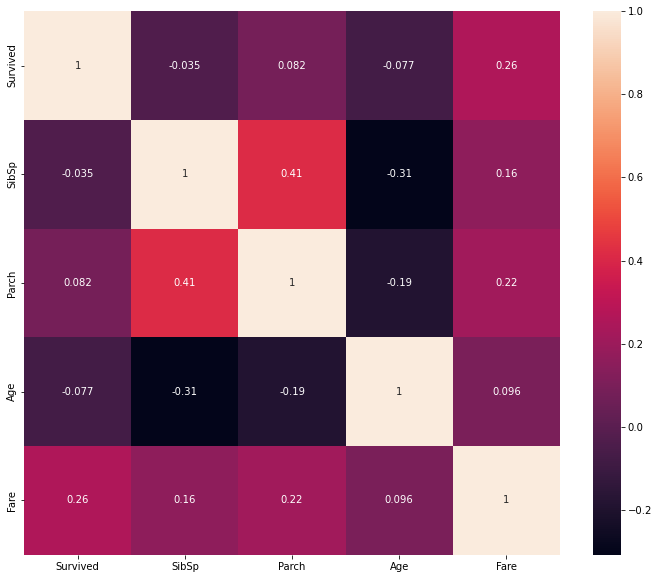

In [136]:
plt.figure(figsize = (12,10))
headmap = sns.heatmap(data[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(),annot = True)

## SIBSP

In [137]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [138]:
data['SibSp'].nunique()

7

F:\A\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


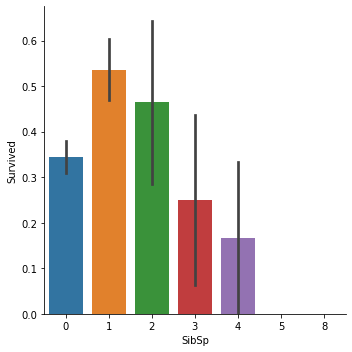

In [139]:
sns.factorplot(x = 'SibSp' , y = 'Survived' , data = data , kind = 'bar')

## AGE

In [140]:
#age_visual = sns.FacetGrid(data , col = 'Survived' , size = 7)
#age_visual = age_visual.map(sns.displot,"Age")
#age_visual = age_visual.set_ylabels("survived_probability")

In [141]:
#sns.factorplot(x = 'Age' , y = 'Survived' , data = data , kind = 'bar')

## SEX

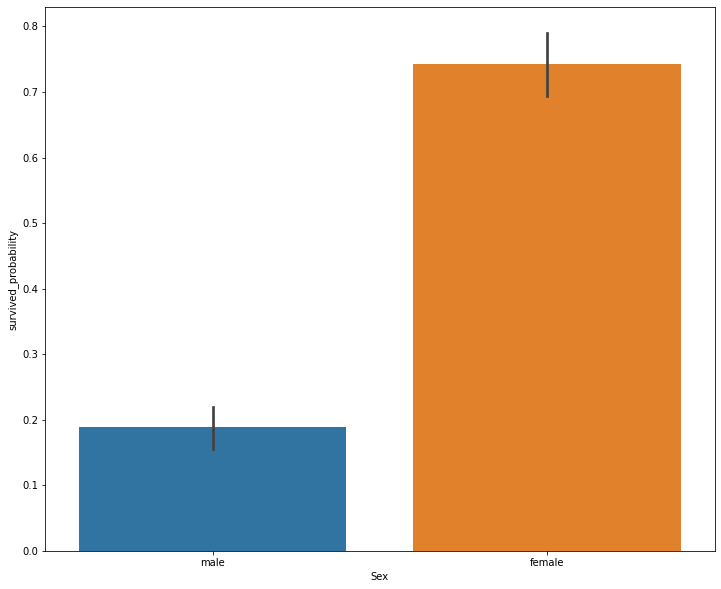

In [142]:
plt.figure(figsize=(12,10))

sex_plot = sns.barplot(x = "Sex" , y = "Survived", data =data)
sex_plot = sex_plot.set_ylabel("survived_probability")

In [143]:
data[['Sex' , 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## PCLASS

F:\A\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


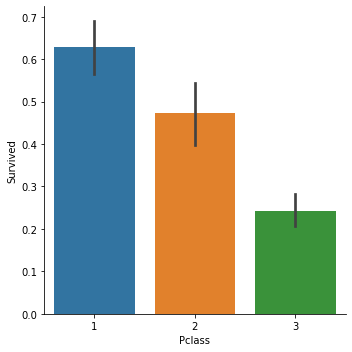

In [144]:
sns.factorplot(x = 'Pclass' , y = 'Survived' , data = data , kind = 'bar')

In [145]:
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

## Embarked

In [146]:
data['Embarked'].isnull().sum()

2

In [147]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [148]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [149]:
data['Embarked'] =data['Embarked'].fillna("S")

F:\A\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


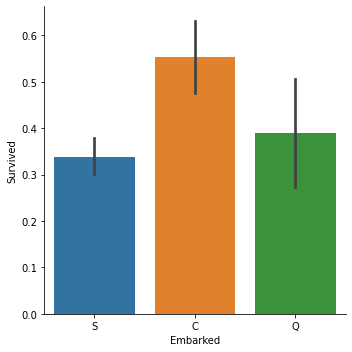

In [150]:
sns.factorplot(x = 'Embarked' , y = 'Survived' , data = data , kind = 'bar')

In [151]:
# there will be a resone: pclass,sex,age

## Preparing data

In [152]:
data = pd.read_csv('titanic_data.csv')

In [153]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [155]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [156]:
mean = data['Age'].mean()
std = data['Age'].std()

is_null = data['Age'].isnull().sum()

rand_age = np.random.randint(mean - std , mean + std , size = is_null)

age_slice = data['Age'].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice

In [157]:
data['Age'].isnull().sum()

0

In [158]:
data['Embarked'].isnull().sum()

2

In [159]:
data['Embarked'] = data['Embarked'].fillna("S")

In [160]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [161]:
col = ['PassengerId' , 'Name' , 'Cabin', 'Ticket']
data.drop(col , axis = 1 , inplace = True)

In [162]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [163]:
genders = {'male' : 0 , 'female' : 1}
data['Sex'] = data['Sex'].map(genders)

In [164]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [165]:
Em = {'S' : 0 , 'C' : 1 , 'Q' : 2}
data['Embarked'] = data['Embarked'].map(Em)

In [166]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [167]:
x = data.drop(data.columns[[0]] , axis =1)
y = data['Survived']

In [168]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.30 , random_state = 0)

In [169]:
alg1 = StandardScaler()

In [170]:
xtrain = alg1.fit_transform(xtrain)
xtest = alg1.transform(xtest)

In [171]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(1000)

In [172]:
logreg.fit(xtrain , ytrain)
svc_classifier.fit(xtrain , ytrain)
dt_classifier.fit(xtrain , ytrain)
knn_classifier.fit(xtrain , ytrain)
rf_classifier.fit(xtrain , ytrain)

RandomForestClassifier(n_estimators=1000)

In [173]:
logreg_pred = logreg.predict(xtest)
svc_classifier_pred = svc_classifier.predict(xtest)
dt_classifier_pred = dt_classifier.predict(xtest)
knn_classifier_pred = knn_classifier.predict(xtest)
rf_classifier_pred =rf_classifier.predict(xtest)

In [176]:
logreg_acc = accuracy_score(logreg_pred , ytest)
svc_acc = accuracy_score(svc_classifier_pred , ytest)
dt_acc = accuracy_score(dt_classifier_pred , ytest)
knn_acc = accuracy_score(knn_classifier_pred , ytest)
rf_acc = accuracy_score(rf_classifier_pred , ytest)

In [179]:
print("Logistic Regression : " ,round(logreg_acc*100 , 2))
print("Support Vector Machine : " ,round(svc_acc*100 , 2))
print("Decision Tree : " ,round(dt_acc*100 , 2))
print("K Nearest Neghibour : " ,round(knn_acc*100, 2))
print("Random Forest : " ,round(rf_acc*100 , 2))

Logistic Regression :  80.22
Support Vector Machine :  80.97
Decision Tree :  75.75
K Nearest Neghibour :  80.97
Random Forest :  81.72
